# **1 - Carregamento dos dados tratados**
---
Nesta etapa é realizada o carregamento dos dados já tratados previamente

In [1]:
import pandas as pd

df = pd.read_csv('dados_tratados_obj.csv')
df.head()

,Status_Cliente,Sexo,Aposentado,Casado,Dependentes,Meses_Contrato,Assinatura_Telefone,Assinatura_MultiTelefone,Assinatura_Internet,Assinatura_Seguro_online,...,Assinatura_Seguro_dispositivo,Assinatura_Suporte_tecnico,Assinatura_TV,Assinatura_Filmes,Tipo_Contrato,Fatura_Online,Forma_Pagamento,Valor_Diario,Valor_Mensal,Valor_Total
0,Ativo,Female,No,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.186667,65.6,593.30
1,Ativo,Male,No,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,1.996667,59.9,542.40
2,Inativo,Male,No,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.463333,73.9,280.85
3,Inativo,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.266667,98.0,1237.85
4,Inativo,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.796667,83.9,267.40


# **2 - Análise quantitativa dos cancelamentos**
---
A primeira análise a ser realizada é saber o percentual de cancelamento dos clientes. Utilizanda função *value_counts()* conseguimos realizar a contagem de clientes ativos (=0) e inativos (0). Como mostrado abaixo, tem-se que cerca de 26.6% dos clientes pediram cancelamento do plano. Como é um valor significativamente alto, é necessário realizar algumas avaliações dos perfis dos clientes que solicitaram o cancelamento do plano contratado.


In [2]:
print('----------------------------------')
print('Quantidade de clientes ativos (0) e inativos (1)')
print(df.Status_Cliente.value_counts())
print('----------------------------------')
print('Quantidade percentual de clientes ativos (0) e inativos (1)')
print(df.Status_Cliente.value_counts(normalize=True).map("{:.1%}".format))
print('----------------------------------')

----------------------------------
Quantidade de clientes ativos (0) e inativos (1)
Ativo      5163
Inativo    1869
Name: Status_Cliente, dtype: int64
----------------------------------
Quantidade percentual de clientes ativos (0) e inativos (1)
Ativo      73.4%
Inativo    26.6%
Name: Status_Cliente, dtype: object
----------------------------------


# **3 -  Análise correlacional entre os dados**
---
A primeira etapa para a análise será de investigar a relação entre os dados dos clientes como uma forma de identificar o perfil do cliente que pedem cancelamento do plano. Para isto, é utilizada a matriz de correlação para mostrar gráficamente se há correlação entre os dados dos clientes.

Com base no gráfico apresentado abaixo, é possível observar que:

1. Os clientes que possuem ***assinatura de TV*** também tendem a assinar os serviços de ***backup***, ***suporte técnico***, ***internet***, ***seguro online***, ***seguro do dispositivo móvel*** e o de ***filmes.***
2. Em particular, os clientes que assinam os serviços de ***seguro,*** tanto o online quanto o do dispositivo móvel, tendem a preferir pela a optar pela cobrança online.
3. Os clientes que assinam os serviços de telefone, tanto o da linha normal quanto o multi-linha, não apresentam interesse em adquirir os demais serviços
4. O perfil dos clientes inativos indicam uma significativa correlação negativa com o valor anual do plano. Enquanto que apresentam uma correlação positiva com o valor mensal. Este comportamento precisa ser avaliado com mais detalhes.
5. A coluna de clientes inativos apresenta uma correlação negativa com a coluna de ***Meses_Contrato*** que indica o tempo do contrato em meses. Enquanto apresenta uma correlação positiva com a coluna ***dependentes***.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio # Para imprimir e salvar as imagens
from biokit.viz import corrplot # Para a plotagem da matriz de correlação

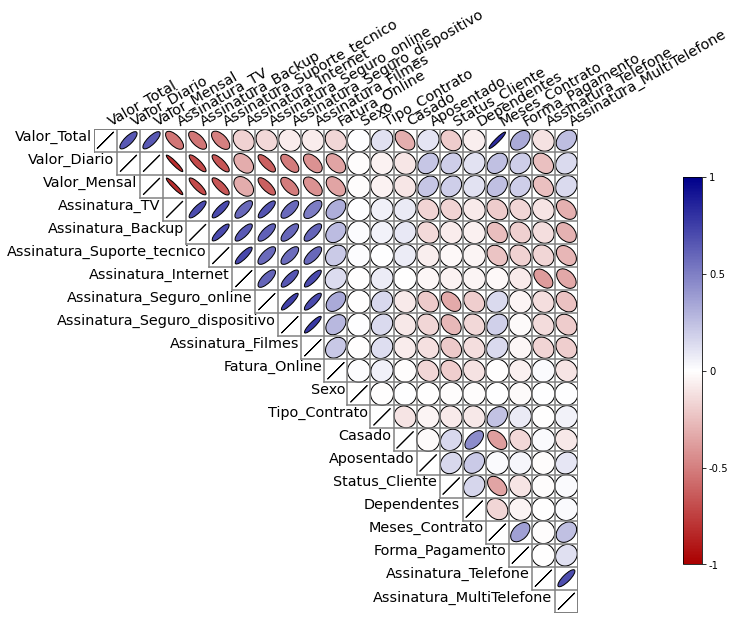

In [5]:
# Avaliando graficamente
df_num = pd.read_csv('dados_tratados_num.csv') # Carregando o arquivo numérico
matriz_corr = df_num.corr()
corr_graph = corrplot.Corrplot(matriz_corr)
corr_graph.plot(upper='ellipse',fontsize='x-large',shrink=1)
fig = plt.gcf()
fig.set_size_inches(90,15)

# **4 - Análise gráfica do perfil dos clientes**
---

A próxima etapa é avaliar gráficamente a relação entre as variáveis e o perfil do cliente que solicita o cancelamento do plano. Para facilitar e tornar o código mais limpo e organizado, é definido uma função para plotar o gráfico de histograma personalizado para as variáveis que se deseja avaliar.

In [20]:
# Função de plotagem
def plot_histograma(data,coluna, coluna_referencia, legenda_x, legenda_y, legenda, legenda_titulo, 
                    coluna_leg_indicador, coluna_refleg_indicador, Nbins):
    
    fig = px.histogram(data, x=coluna, color = coluna_referencia, title = legenda_titulo, nbins = Nbins, histnorm = None, barnorm = 'percent' )
    fig.update_traces( opacity=0.8, marker_line_width=1.5, marker_line_color = 'rgb(0,0,0)')
    fig.update_layout(bargap=0.05, legend_title = legenda)
    fig.update_xaxes(title_text=legenda_x)
    fig.update_yaxes( title_text = legenda_y)
    fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace(coluna, coluna_leg_indicador))) 
    fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace(coluna_referencia, coluna_refleg_indicador)))
    fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count (normalized as percent)", "Percentual")))
    fig.show()
    return fig

## **4.1 - Análise da evasão de clientes**

O gráfico abaixo exibe o resultado já observado anteriormente, onde um pouco mais de 26% dos clientes pediram o cancelamento do plano.

In [28]:
# Criadno um dataframe temporário para plotar o gráfico de evasão de clientes
df_inativo = df.Status_Cliente.value_counts(normalize=True)*100
df_inativo = df_inativo.to_frame().reset_index()
df_inativo.columns = ['Situação do cliente', 'Percentual']
df_inativo['Percentual'] = df_inativo['Percentual'].round(1)

fig = px.bar(df_inativo, x = df_inativo['Situação do cliente'], y = df_inativo['Percentual'], color = "Situação do cliente", text='Percentual',
    title="Avaliação da taxa de evasão dos clientes")
fig.update_traces(textfont_size=16, textangle=0, textposition="inside", cliponaxis=False, opacity=0.8, marker_line_width=1.5,
    marker_line_color = 'rgb(0,0,0)')
fig.show()

# Para salvar a imagem
w = 1000
h = 500
sc = 6
pio.write_image(fig, 'percentual_evasao.png',scale=sc, width=w, height=h)

In [27]:
fig.write_image("fig1.png")

## **4.2 - Perfil de gastos dos clientes**

A primeira hipótese é verificar se o valor do plano adotado influencia na tomada de decisão do cliente. Assim, é analisada o perfil de dos valores mensais e anuais dos planos adquiridos e a porcentagem de clientes que estão inativo para cada faixa de valor. 

### **4.2.1 - Perfil de gasto mensal dos clientes**

O gráfico a seguir apresenta o histograma dos valores mensais dos planos e a respectiva porcentagem de cancelamento (indicada em cor vermelha). Pode-se que:

1. Os planos entre $60,00 e $100,00 apresentam maiores índices de cancelamento, maiores até que a média geral.
2. Os planos abaixos de $20,00 apresentam a menor taxa de evasão, cerca de 10%. 

In [21]:
# Personalização
coluna = 'Valor_Mensal'
coluna_referencia = 'Status_Cliente'
legenda_x = 'Valor mensal do plano'
legenda_y = 'Percentual de clientes ativos e inativos'
legenda = 'Situação do cliente'
legenda_titulo = 'Situação dos clientes em relação ao custo mensal do plano'
coluna_leg_indicador = 'Valor mensal' 
coluna_refleg_indicador = 'Situação do cliente'
Nbins = 6

fig = plot_histograma(df,coluna, coluna_referencia, legenda_x, legenda_y, legenda, legenda_titulo, 
                    coluna_leg_indicador, coluna_refleg_indicador, Nbins)

# Para salvar a imagem
pio.write_image(fig, 'hist_custo_mensal.png',scale=6, width=1080, height=1080)

### **4.2.2 - Perfil de gasto total dos clientes**

Em relação ao plano anual, observa-se que os planos mais baratos apresentam a taxa de cancelamento de 37%.  

In [9]:
# Personalização
coluna = 'Valor_Total'
coluna_referencia = 'Status_Cliente'
legenda_x = 'Valor total do plano'
legenda_y = 'Percentual de clientes ativos e inativos'
legenda = 'Situação do cliente'
legenda_titulo = 'Situação dos clientes em relação ao custo total do plano'
coluna_leg_indicador = 'Valor total' 
coluna_refleg_indicador = 'Situação do cliente'
Nbins = 10

plot_histograma(df,coluna, coluna_referencia, legenda_x, legenda_y, legenda, legenda_titulo, 
                coluna_leg_indicador, coluna_refleg_indicador, Nbins)

# Para salvar a imagem
pio.write_image(fig, 'hist_custo_total.png',scale=6, width=1080, height=1080)

### **4.2.3 - Valor médio mensal do contrato por cliente**

O gráfico abaixo mostra o valor mensal médio pago dos clientes ativo e inativos. Este resultado mostra que, no geral, os clientes que pediram cancelamento estavam pagando cerca de $ 13,00 a mais que os clientes que ainda estão ativos. Isto indica que o valor do plano tem forte influência no pedido de cancelamento. Em outras palavras, os clientes que estão inativos provavelmente estão migrando para outros planos mais em conta de outras empresas.

In [10]:
# Criando e organizando o dataframe de plotagem
data_aux = df[['Status_Cliente', 'Valor_Mensal', 'Valor_Total']].groupby('Status_Cliente').mean().round(2)
data_aux = [ ['Ativo'   , data_aux['Valor_Mensal'][0] , data_aux['Valor_Total'][0]], 
             ['Inativo' , data_aux['Valor_Mensal'][1] , data_aux['Valor_Total'][1] ] ]
df_media_gastos = pd.DataFrame(data_aux, columns = ['Situação do cliente', 'Valor mensal médio do plano', 'Valor total médio do plano'])

# Plotando em gráfico de barras
fig = px.bar(df_media_gastos, x = df_media_gastos['Situação do cliente'], y = df_media_gastos['Valor mensal médio do plano'], 
    color = 'Situação do cliente' ,text='Valor mensal médio do plano', title="Índice de cancelamento por valor médio mensal do plano contratado")
fig.update_traces(textfont_size=16, textangle=0, textposition="inside", cliponaxis=False, opacity=0.8, marker_line_width=1.5,
    marker_line_color = 'rgb(0,0,0)')
fig.show()

# Para salvar a imagem
pio.write_image(fig, 'barplot_custo_mensal_medio.png',scale=6, width=1080, height=1080)

### **4.2.4 - Valor médio anual do contrato por cliente**

O gráfico abaixo exibe a média do plano anual pago pelos clientes ativos e inativos. Diferentemente do que foi observado anteriormente, o perfil dos clientes inativos pagavam, em média, um valor anual menor que os clientes ainda ativos. Isto pode indicar que os clientes que aderem a mais serviços da empresa tendem a permanecer na empresa.

In [11]:
# Plotando em gráfico de barras
fig = px.bar(df_media_gastos, x = df_media_gastos['Situação do cliente'], y = df_media_gastos['Valor total médio do plano'], 
    color = 'Situação do cliente' ,text='Valor total médio do plano', 
    title="Índice de cancelamento por valor médio total do plano contratado")
fig.update_traces(textfont_size=16, textangle=0, textposition="inside", cliponaxis=False, opacity=0.8, marker_line_width=1.5,
    marker_line_color = 'rgb(0,0,0)')
fig.show()

# Para salvar a imagem
pio.write_image(fig, 'barplot_custo_total_medio.png',scale=6, width=1080, height=1080)

### **4.2.5 - Distribuição dos valores totais dos planos**

A distribuição dos valores totais mostra que os valores dos planos pagos pelos clientes que pediram o cancelamento é, em média, menor que os clientes que não pediram o cancelamento. Isto já reforça o que foi observado no gráfico anterior. Outro detalhe que chama bastante atenção é a presença de outliers para os clientes que cancelaram o plano, os valores totais acima do terceiro quartil são consideralvemente altos. 

In [12]:
fig = px.box(df, x = 'Status_Cliente', y = 'Valor_Total', color = 'Status_Cliente', title = 'Distribuição dos valores totais dos planos')

fig.update_traces( opacity=0.8, marker_line_width=1.5, marker_line_color = 'rgb(0,0,0)')
fig.update_layout(bargap=0.05, legend_title = 'Situação do cliente')
fig.update_xaxes(title_text='Situação do cliente')
fig.update_yaxes( title_text = 'Valor total do plano' )
fig.show()

# Para salvar a imagem
pio.write_image(fig, 'boxplot_custo_total.png',scale=6, width=1080, height=1080)

## **4.3 - Tempo de contrato**

O tempo de contrato dos clientes tambem é avaliado para definir se o fator de fidelização tem influência na permanência do cliente.

### **4.3.1 - Tempo total de contrato**

No histograma de tempo total, a maior parte dos clientes que pediram cancelamento ficaram menos de2 anos com a empresesa. Em especial, cerca de 50% do clientes pediram cancelamento antes do primeiro ano.

In [13]:
# Personalização
coluna = 'Meses_Contrato'
coluna_referencia = 'Status_Cliente'
legenda_x = 'Duração do plano'
legenda_y = 'Percentual de clientes ativos e inativos'
legenda = 'Situação do cliente'
legenda_titulo = 'Situação dos clientes em relação a duração do plano'
coluna_leg_indicador = 'Duração do plano' 
coluna_refleg_indicador = 'Situação do cliente'
Nbins = 10

plot_histograma(df,coluna, coluna_referencia, legenda_x, legenda_y, legenda, legenda_titulo, 
                    coluna_leg_indicador, coluna_refleg_indicador, Nbins)

# Para salvar a imagem
pio.write_image(fig, 'hist_duracao_plano.png',scale=6, width=1080, height=1080)

### **4.3.2 - Primeiro ano de contrato**

Plotando o histograma para o perfil dos clientes com menos de 1 ano de contrato, é possível observar que cerca de 62% dos clientes pedem cancelamento no primeiro mês de serviço. Isto pode indicar uma falha na instalação, cobrança ou atendimento que comprometam a satisfação do cliente ao aderir ao plano. A medida que o tempo de contrato vai aumentando, o percentual de clientes que vão pedindo o cancelamento vai diminuindo e se aproximando da média, que é de 25%.

In [14]:
# Personalização
coluna = 'Meses_Contrato'
coluna_referencia = 'Status_Cliente'
legenda_x = 'Duração do plano'
legenda_y = 'Percentual de clientes ativos e inativos'
legenda = 'Situação do cliente'
legenda_titulo = 'Situação dos clientes em relação no primeiro ano de contrato'
coluna_leg_indicador = 'Duração do plano' 
coluna_refleg_indicador = 'Situação do cliente'
Nbins = 6

plot_histograma(df.query('Meses_Contrato <= 12'),coluna, coluna_referencia, legenda_x, legenda_y, legenda, legenda_titulo, 
                    coluna_leg_indicador, coluna_refleg_indicador, Nbins)

# Para salvar a imagem
pio.write_image(fig, 'hist_duracao_plano_1ano.png',scale=6, width=1080, height=1080)

## **4.4 - Relação da taxa de cancelamento com a qualidade do serviço**

### **4.4.1 - Serviço de telefone**

Para o serviço de telefone, não foi observado uma diferença significativa na taxa de cancelamento entre os que clientes que aeriram ou não ao serviço.

In [15]:
# Personalização
coluna = 'Assinatura_Telefone'
coluna_referencia = 'Status_Cliente'
legenda_x = 'Adesão ao serviço de telefone'
legenda_y = 'Percentual de clientes ativos e inativos'
legenda = 'Situação do cliente'
legenda_titulo = 'Situação dos clientes em relação à assinatura de telefone'
coluna_leg_indicador = 'Serviço de telefone' 
coluna_refleg_indicador = 'Situação do cliente'
Nbins = 2

plot_histograma(df,coluna, coluna_referencia, legenda_x, legenda_y, legenda, legenda_titulo, 
                    coluna_leg_indicador, coluna_refleg_indicador, Nbins)

# Para salvar a imagem
pio.write_image(fig, 'barplot_telefone.png',scale=6, width=1080, height=1080)

### **4.4.2 - Serviço de multi-linha de telefone**

Para o serviço multi-linha de telefone, também não foi observado nenhuma diferença significativa entre os clientes que optaram ou não por aderir a tal serviço.

In [16]:
# Personalização
coluna = 'Assinatura_MultiTelefone'
coluna_referencia = 'Status_Cliente'
legenda_x = 'Adesão ao serviço de multi-linha de telefone'
legenda_y = 'Percentual de clientes ativos e inativos'
legenda = 'Situação do cliente'
legenda_titulo = 'Situação dos clientes em relação à assinatura de multi-linha de telefone'
coluna_leg_indicador = 'Serviço de multi-linha' 
coluna_refleg_indicador = 'Situação do cliente'
Nbins = None

plot_histograma(df,coluna, coluna_referencia, legenda_x, legenda_y, legenda, legenda_titulo, 
                    coluna_leg_indicador, coluna_refleg_indicador, Nbins)

# Para salvar a imagem
pio.write_image(fig, 'barplot_multitelefone.png',scale=6, width=1080, height=1080)

### **4.4.3 - Serviço de assinatura de TV**

Para o serviço de assinatura de TV, os dados são descrito como clientes que possuem ou não o serviço e os clientes que não possuem o serviço de internet. Este dados é divido desta maneira pois o serviço de Tv oferecido é por streaming, isto é, utilizando a conexão de internet. Sabendo disto, observa-se que a taxa de cancelamento entre os cliente que possuem ou não o serviço de TV por streaming apresentam taxas de cancelamento parecidas entre si, em torno de 30 à 33%. Enuqanto os clientes que não tem o serviço de internet e, consequentemente, o de TV apresentam uma taxa de cancelamento muito menor, em torno de 7.4%. Isto indica que o serviço de internet fornecido pode não ser satisfatório. A próxima análise irá verificar esta hipótese.

In [17]:
# Personalização
coluna = 'Assinatura_TV'
coluna_referencia = 'Status_Cliente'
legenda_x = 'Adesão ao serviço de TV'
legenda_y = 'Percentual de clientes ativos e inativos'
legenda = 'Situação do cliente'
legenda_titulo = 'Situação dos clientes em relação à assinatura de TV'
coluna_leg_indicador = 'Serviço de TV' 
coluna_refleg_indicador = 'Situação do cliente'
Nbins = None

plot_histograma(df,coluna, coluna_referencia, legenda_x, legenda_y, legenda, legenda_titulo, 
                    coluna_leg_indicador, coluna_refleg_indicador, Nbins)

# Para salvar a imagem
pio.write_image(fig, 'barplot_tv.png',scale=6, width=1080, height=1080)

### **4.4.4 - Serviço de internet**

Para o serviço de internet, observa-se que a taxa de cancelamento para o serviço de internet via fibra óptica é consideralvemente alta (cerca de 42%) comparada ao fornecimento via DSL. Isto indica que a qualidade da internet via fibra óptica não está atendendo aos clientes.

In [18]:
# Personalização
coluna = 'Assinatura_Internet'
coluna_referencia = 'Status_Cliente'
legenda_x = 'Adesão ao serviço de internet'
legenda_y = 'Percentual de clientes ativos e inativos'
legenda = 'Situação do cliente'
legenda_titulo = 'Situação dos clientes em relação à assinatura de internet'
coluna_leg_indicador = 'Serviço de internet' 
coluna_refleg_indicador = 'Situação do cliente'
Nbins = 2

plot_histograma(df,coluna, coluna_referencia, legenda_x, legenda_y, legenda, legenda_titulo, 
                    coluna_leg_indicador, coluna_refleg_indicador, Nbins)

# Para salvar a imagem
pio.write_image(fig, 'barplot_internet.png',scale=6, width=1080, height=1080)

### **4.4.5 - Serviço de streaming de filmes**

Para o serviço de streaming de filmes, é observado comportamento bastante semelhante ao do serviço de TV. Os planos que possuem o serviço de internet, possuindo ou não o serviço de streaming de fiilmes, apresentam taxas de cancelamentos semelhantes e próximos dos 31%. Já os planos que não possuem serviço de internet a taxa de cancelamento é cerca de 8%.

In [19]:
# Personalização
coluna = 'Assinatura_Filmes'
coluna_referencia = 'Status_Cliente'
legenda_x = 'Adesão ao serviço de streaming de filmes'
legenda_y = 'Percentual de clientes ativos e inativos'
legenda = 'Situação do cliente'
legenda_titulo = 'Situação dos clientes em relação à assinatura de streaming de filmes'
coluna_leg_indicador = 'Serviço de streaming de filme' 
coluna_refleg_indicador = 'Situação do cliente'
Nbins = None

plot_histograma(df,coluna, coluna_referencia, legenda_x, legenda_y, legenda, legenda_titulo, 
                    coluna_leg_indicador, coluna_refleg_indicador, Nbins)

# Para salvar a imagem
pio.write_image(fig, 'barplot_internet.png',scale=6, width=1080, height=1080)

### **4.4.6 - Serviço de suporte técnico**

Para o serviço de suporte técnico, observa-se que a taxa de cancelamento é significativamente alto (cerca de 42%) para os planos que não possuem este serviço. Enquanto que a taxa de cancelamento para os planos com o suporte é menor, cerca de 16%.

In [ ]:
# Personalização
coluna = 'Assinatura_Suporte_tecnico'
coluna_referencia = 'Status_Cliente'
legenda_x = 'Adesão ao serviço de suporte técnico'
legenda_y = 'Percentual de clientes ativos e inativos'
legenda = 'Situação do cliente'
legenda_titulo = 'Situação dos clientes em relação à assinatura de suporte técnico'
coluna_leg_indicador = 'Serviço de suporte técnico' 
coluna_refleg_indicador = 'Situação do cliente'

plot_histograma(df,coluna, coluna_referencia, legenda_x, legenda_y, legenda, legenda_titulo, 
                    coluna_leg_indicador, coluna_refleg_indicador)

### **4.4.7 - Serviço de Backup**

O serviço de Backup apresenta resultados semelhantes ao do serviço de suporte técnico. 

In [ ]:
# Personalização
coluna = 'Assinatura_Backup'
coluna_referencia = 'Status_Cliente'
legenda_x = 'Adesão ao serviço de backup'
legenda_y = 'Percentual de clientes ativos e inativos'
legenda = 'Situação do cliente'
legenda_titulo = 'Situação dos clientes em relação à assinatura de backup'
coluna_leg_indicador = 'Serviço de backup' 
coluna_refleg_indicador = 'Situação do cliente'

plot_histograma(df,coluna, coluna_referencia, legenda_x, legenda_y, legenda, legenda_titulo, 
                    coluna_leg_indicador, coluna_refleg_indicador)

### **4.4.8 - Serviço de seguro online**

In [ ]:
# Personalização
coluna = 'Assinatura_Seguro_online'
coluna_referencia = 'Status_Cliente'
legenda_x = 'Adesão ao serviço de seguro online'
legenda_y = 'Percentual de clientes ativos e inativos'
legenda = 'Situação do cliente'
legenda_titulo = 'Situação dos clientes em relação à assinatura de seguro online'
coluna_leg_indicador = 'Serviço de seguro online' 
coluna_refleg_indicador = 'Situação do cliente'

plot_histograma(df,coluna, coluna_referencia, legenda_x, legenda_y, legenda, legenda_titulo, 
                    coluna_leg_indicador, coluna_refleg_indicador)

### **4.4.9 - Seguro dispositivo**

In [ ]:
# Personalização
coluna = 'Assinatura_Seguro_dispositivo'
coluna_referencia = 'Status_Cliente'
legenda_x = 'Adesão ao serviço de seguro online'
legenda_y = 'Percentual de clientes ativos e inativos'
legenda = 'Situação do cliente'
legenda_titulo = 'Situação dos clientes em relação à assinatura de seguro do dispositivo'
coluna_leg_indicador = 'Serviço de seguro do dispositivo' 
coluna_refleg_indicador = 'Situação do cliente'

plot_histograma(df,coluna, coluna_referencia, legenda_x, legenda_y, legenda, legenda_titulo, 
                    coluna_leg_indicador, coluna_refleg_indicador)

## **4.5 - Tipo de fatura**

### **4.5.1 - Fatura online**

O serviço de fatura online apresenta cerca do dobro da taxa de cancelamento (33.5%) comparado aos planos que não possuem o serviço.

In [ ]:
# Personalização
coluna = 'Fatura_Online'
coluna_referencia = 'Status_Cliente'
legenda_x = 'Adesão ao serviço de fatura online'
legenda_y = 'Percentual de clientes ativos e inativos'
legenda = 'Situação do cliente'
legenda_titulo = 'Situação dos clientes em relação a adesão da fatura online'
coluna_leg_indicador = 'Fatura online' 
coluna_refleg_indicador = 'Situação do cliente'

plot_histograma(df,coluna, coluna_referencia, legenda_x, legenda_y, legenda, legenda_titulo, 
                    coluna_leg_indicador, coluna_refleg_indicador)

### **4.5.2 - Forma de pagamento**

As formas de pagamento via boleto, credit card e transferência bancária apresentam a taxa de cancelamento menor que a média geral. Enquanto que a forma de boleto eletrônico apresenta uma taxa significativamente maior, em torno de 46%. Isto pode ser um indicador a possíveis problemas de geração de boletos online. 

In [ ]:
# Personalização
coluna = 'Forma_Pagamento'
coluna_referencia = 'Status_Cliente'
legenda_x = 'Forma de pagamento escolhido'
legenda_y = 'Percentual de clientes ativos e inativos'
legenda = 'Situação do cliente'
legenda_titulo = 'Situação dos clientes em relação a forma de pagamento'
coluna_leg_indicador = 'Forma de pagamento' 
coluna_refleg_indicador = 'Situação do cliente'

plot_histograma(df,coluna, coluna_referencia, legenda_x, legenda_y, legenda, legenda_titulo, 
                    coluna_leg_indicador, coluna_refleg_indicador)

### **4.5.3 - Tipo do contrato**

Quanto ao tipo de contrato, foi observado que os clientes que optam pelo plano mensal tem mais chances de pedir o cancelamento. A taxa de evasão para este tipo de plano é de em torno de 43%.

In [ ]:
# Personalização
coluna = 'Tipo_Contrato'
coluna_referencia = 'Status_Cliente'
legenda_x = 'Tipo de contrato'
legenda_y = 'Percentual de clientes ativos e inativos'
legenda = 'Situação do cliente'
legenda_titulo = 'Situação dos clientes em relação ao tipo de contrato'
coluna_leg_indicador = 'Tipo de contrato' 
coluna_refleg_indicador = 'Situação do cliente'

plot_histograma(df,coluna, coluna_referencia, legenda_x, legenda_y, legenda, legenda_titulo, 
                    coluna_leg_indicador, coluna_refleg_indicador)

## **4.6 - Análise do perfil do cliente**

### **4.6.1 - Fator idade**

Os clientes aponsetados possuem uma taxa de evasão de aproximadamente 42%

In [ ]:
# Personalização
coluna = 'Aposentado'
coluna_referencia = 'Status_Cliente'
legenda_x = 'Aposentado'
legenda_y = 'Percentual de clientes ativos e inativos'
legenda = 'Situação do cliente'
legenda_titulo = 'Perfil dos clientes em relação a aposentadoria'
coluna_leg_indicador = 'Aposentado' 
coluna_refleg_indicador = 'Situação do cliente'

plot_histograma(df,coluna, coluna_referencia, legenda_x, legenda_y, legenda, legenda_titulo, 
                    coluna_leg_indicador, coluna_refleg_indicador)

### **4.6.2 - Estado civil**

Os clientes casados possuem uma taxa de evasão menor que os clientes não casados. Isto pode indicar relação direta com a presença de dependentes no local, como indicado no mapa de correlação (Seção 3).

In [ ]:
# Personalização
coluna = 'Casado'
coluna_referencia = 'Status_Cliente'
legenda_x = 'Casado'
legenda_y = 'Percentual de clientes ativos e inativos'
legenda = 'Situação do cliente'
legenda_titulo = 'Perfil dos clientes em relação ao estado civil'
coluna_leg_indicador = 'Casado' 
coluna_refleg_indicador = 'Situação do cliente'

plot_histograma(df,coluna, coluna_referencia, legenda_x, legenda_y, legenda, legenda_titulo, 
                    coluna_leg_indicador, coluna_refleg_indicador)

### **4.6.3 - Dependentes**

Confirmando o que havia se pensado, os clientes que possuem dependentes também apresentam uma taxa de evasão menor comparado aos clientes que não possuem dependentes.  

In [ ]:
# Personalização
coluna = 'Dependentes'
coluna_referencia = 'Status_Cliente'
legenda_x = 'Dependentes'
legenda_y = 'Percentual de clientes ativos e inativos'
legenda = 'Situação do cliente'
legenda_titulo = 'Perfil dos clientes em relação aos dependentes'
coluna_leg_indicador = 'Dependentes' 
coluna_refleg_indicador = 'Situação do cliente'

plot_histograma(df,coluna, coluna_referencia, legenda_x, legenda_y, legenda, legenda_titulo, 
                    coluna_leg_indicador, coluna_refleg_indicador)

In [ ]:
df.Dependentes